In [139]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns

In [140]:
data = pd.read_csv('data/data.csv')
data.head()

,Dates of the year 2009,Reference value of\r\nT_{B} (K) at\r\n23.834GHz,Reference Value of\r\nT_{B} (K) at 30GHz,Precursor time of\r\nrain event (minutes)
0,14 Jan,70.26,30.80,35.58
1,15 Jan,68.15,30.25,36.18
2,16-17 Jan,72.23,33.58,38.65
3,17 Jan,73.04,31.75,36.49
4,18 Jan,68.80,30.43,38.05


In [141]:
data.shape

(52, 4)

In [142]:
newColumns = ['Date','T23.834GHz','T30GHz','raintime']
data.columns = newColumns
data.head()

,Date,T23.834GHz,T30GHz,raintime
0,14 Jan,70.26,30.80,35.58
1,15 Jan,68.15,30.25,36.18
2,16-17 Jan,72.23,33.58,38.65
3,17 Jan,73.04,31.75,36.49
4,18 Jan,68.80,30.43,38.05


In [143]:
data.dropna(inplace=True)
data.isna().sum()

Date          0
T23.834GHz    0
T30GHz        0
raintime      0
dtype: int64

In [144]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51 entries, 0 to 50
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date        51 non-null     object 
 1   T23.834GHz  51 non-null     float64
 2   T30GHz      51 non-null     float64
 3   raintime    51 non-null     float64
dtypes: float64(3), object(1)
memory usage: 2.0+ KB


In [145]:
data['T30GHz'].astype('float64')
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51 entries, 0 to 50
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date        51 non-null     object 
 1   T23.834GHz  51 non-null     float64
 2   T30GHz      51 non-null     float64
 3   raintime    51 non-null     float64
dtypes: float64(3), object(1)
memory usage: 2.0+ KB


In [146]:
data.describe()

,T23.834GHz,T30GHz,raintime
count,51.000000,51.000000,51.000000
mean,65.675098,30.083333,37.839804
std,10.972433,6.916716,4.492920
min,39.910000,16.140000,29.960000
25%,54.850000,24.270000,35.880000
50%,70.660000,30.430000,38.560000
75%,73.785000,34.360000,40.610000
max,81.110000,46.790000,47.200000


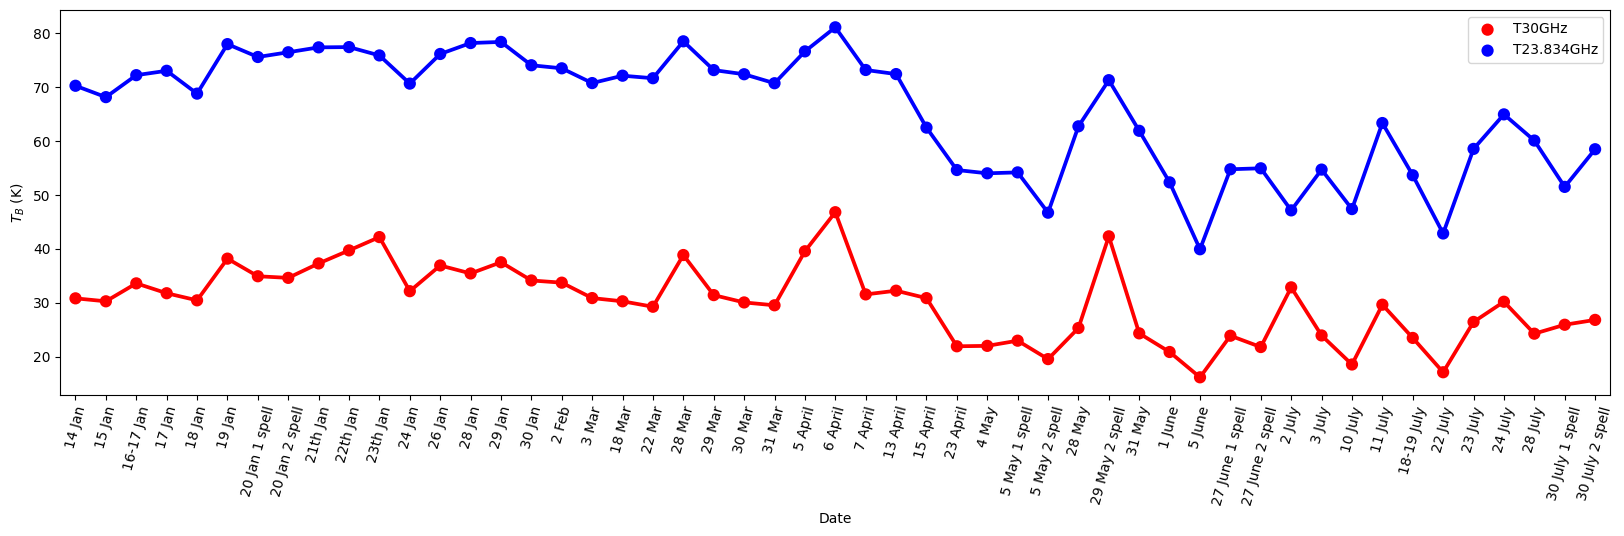

In [147]:
plt.figure(figsize=(20,5))
sns.pointplot(x='Date',y='T30GHz',data=data,color='red',label='T30GHz')
sns.pointplot(x='Date',y='T23.834GHz',data=data,color='blue',label='T23.834GHz')
plt.legend()
plt.xlabel('Date')
plt.ylabel(r'$T_B$ (K)')
plt.xticks(rotation=75)
plt.show()

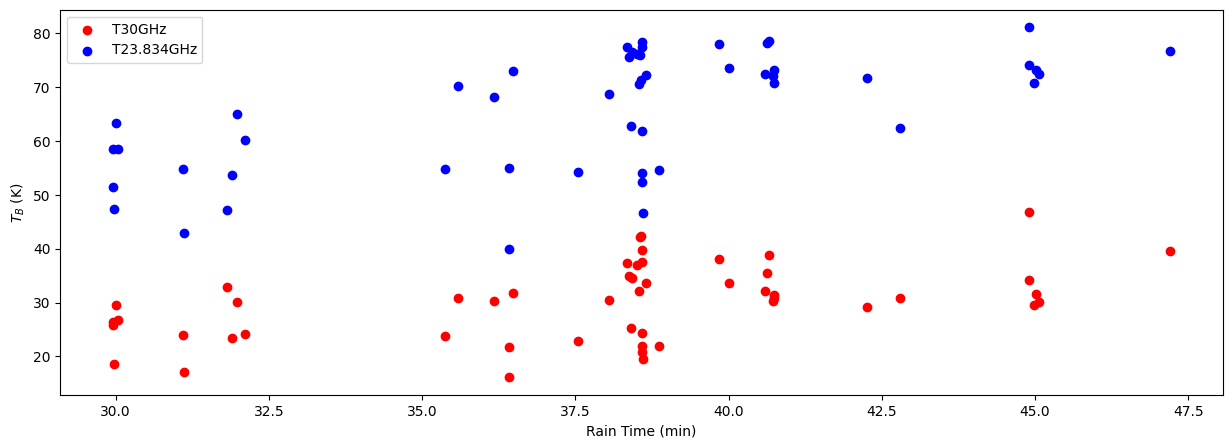

In [148]:
plt.figure(figsize=(15,5))
plt.scatter(
    data['raintime'],
    data['T30GHz'],
    color='red',
    label='T30GHz'
)
plt.scatter(
    data['raintime'],
    data['T23.834GHz'],
    color='blue',
    label='T23.834GHz'
)
plt.xlabel('Rain Time (min)')
plt.ylabel(r'$T_B$ (K)')
plt.legend()
plt.show()

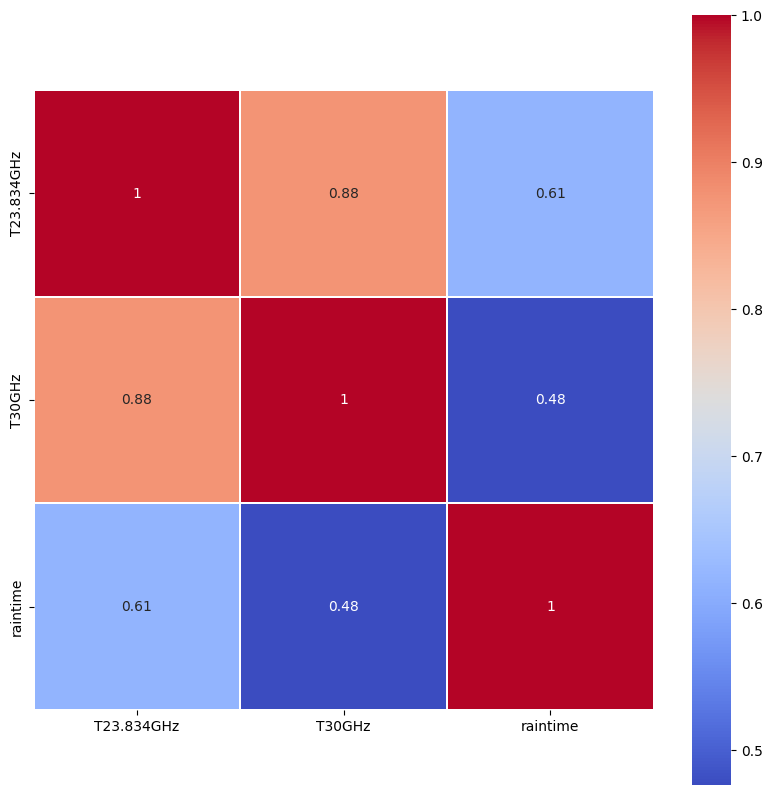

In [149]:
corr = data.corr(numeric_only=True)
plt.figure(figsize=(10,10))
sns.heatmap(
    corr,
    annot=True,
    cmap='coolwarm',
    linewidths=0.2,
    annot_kws={'size':10},
    square=True
)
plt.show()

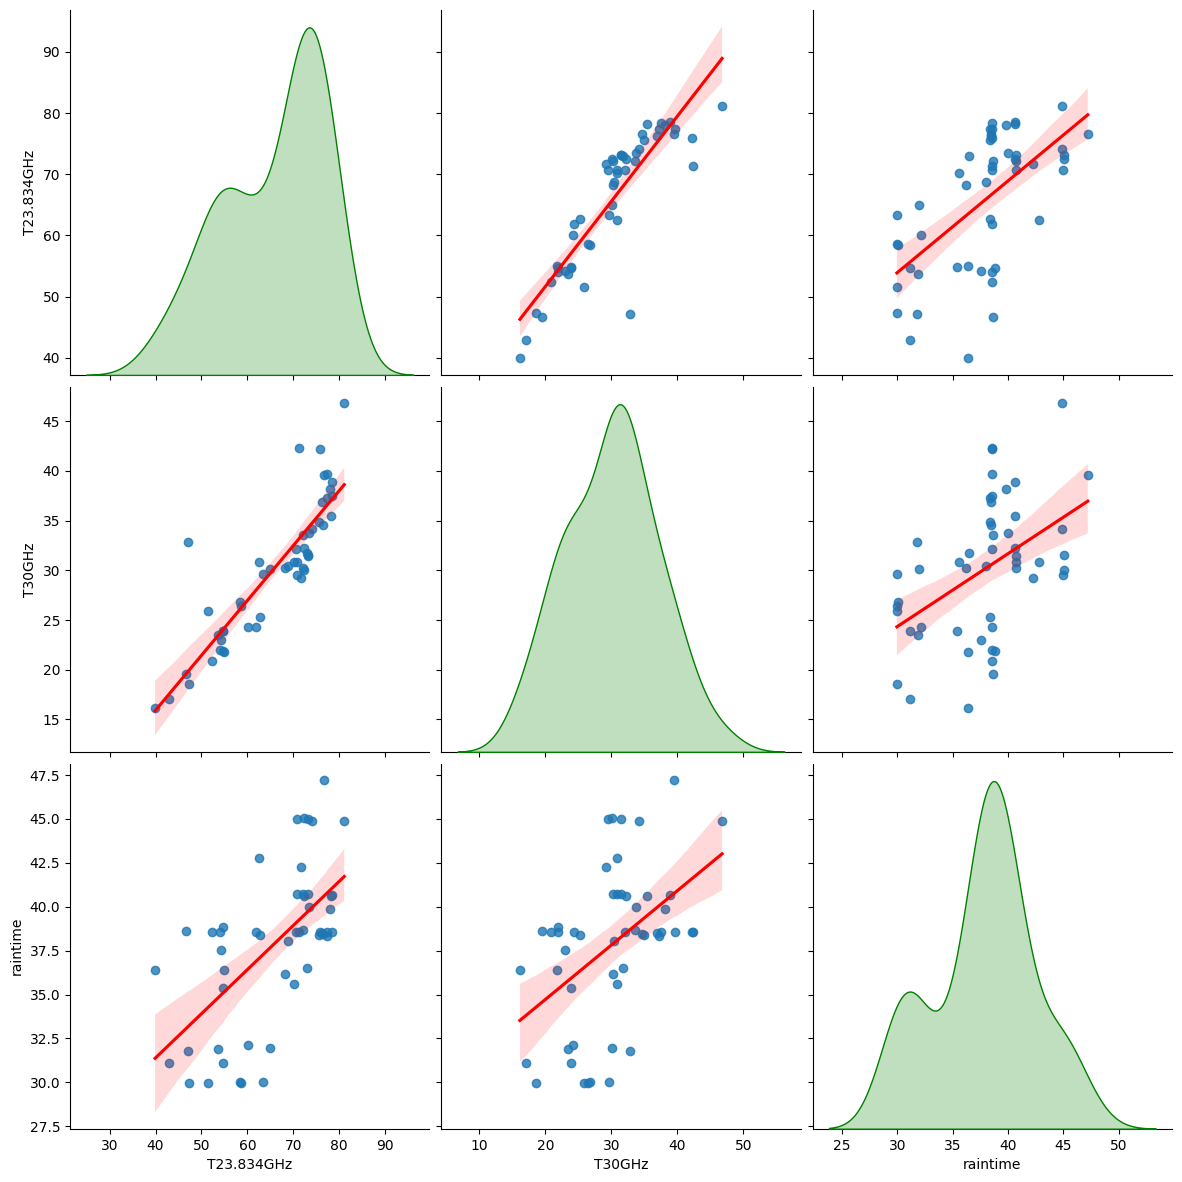

In [150]:
sns.pairplot(
    data,
    kind='reg',
    diag_kind='kde',
    plot_kws={'line_kws':{'color':'red'}},
    diag_kws={'color':'green'},
    height=4
)
plt.show()

In [151]:
xTrain = data[['T23.834GHz','T30GHz']]
yTrain = data['raintime']